In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wine_export_amount = pd.read_excel('/content/exportacao_vinho_quantidade.xlsx')
wine_export_value = pd.read_excel('/content/exportacao_vinho_valor.xlsx')
demographic_data = pd.read_excel('/content/demographic_data.xlsx')

print(wine_export_amount.head())
print(wine_export_value.head())
print(demographic_data.head())


   Id              Country   2007   2008   2009   2010   2011  2012  2013  \
0   1          Afghanistan      0      0      0      0      0     0     0   
1   2         South Africa      0      0      0      0      0     0     0   
2   4               Angola  25931  25721  54786  33557  13889  2833  1573   
3   6  Antigua and Barbuda      0      0      0      0      0     0     0   
4   8            Argentina      0      0    162      0  13253     0     0   

    2014  2015  2016   2017   2018  2019  2020  2021     Average   Total  
0      0     0     0      0      0     0     0    11      0.6875      11  
1      0     0     0      0      0    26     4     0      1.8750      30  
2  12182  1908  7359  10170    477   345     0     0  12156.0625  194497  
3      0     0     0      0     37   219   624   805    105.3125    1685  
4  20385     0     0      0  15711     0  1015     6   3158.2500   50532  
   Id              Country   2007   2008   2009    2010   2011  2012  2013  \
0   1    

In [19]:
#match top and bottom 10 countries by total import amount

top_10_import = wine_export_amount.nlargest(10, 'Total')
bottom_10_import = wine_export_amount.nsmallest(10, 'Total')

print(top_10_import)
print(bottom_10_import)


     Id             Country     2007     2008      2009    2010    2011  \
86  102  Russian Federation   266400  6207658  21912914       0       0   
79   94            Paraguay  1285459  2191901    486927  510989  240168   
39   48       United States   479269   443895    372319  228968  306787   
24   29               China     7638     8689   1553416     795   54156   
38   47               Spain        0     2942      2181       0    5206   
61   74               Japan   357943   232293    217974  112178  100835   
77   92         Netherlands   181046   340412    171654   87368  125414   
84  100      United Kingdom    84613   100097     30092  123624  122629   
51   61               Haiti        0       20      4500    2700       0   
82   98            Portugal   109074    49090    141000    4577      95   

       2012     2013    2014    2015    2016     2017     2018     2019  \
86  4528176  5893291  190656   47664       0        0        0        0   
79   354824   481564  52

In [20]:

#demographics_filtered = demographic_data[demographic_data['Country'].isin(top_10_import['Country']) | demographic_data['Country'].isin(bottom_10_import['Country'])]

#gdp_per_capita = demographics_filtered[demographics_filtered['Series Name'] == 'GDP per capita (current US$)']



<ipython-input-42-31fbc72e9a8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_gdp['Group'] = 'Top 10 Importers'
<ipython-input-42-31fbc72e9a8a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_gdp['Group'] = 'Bottom 10 Importers'


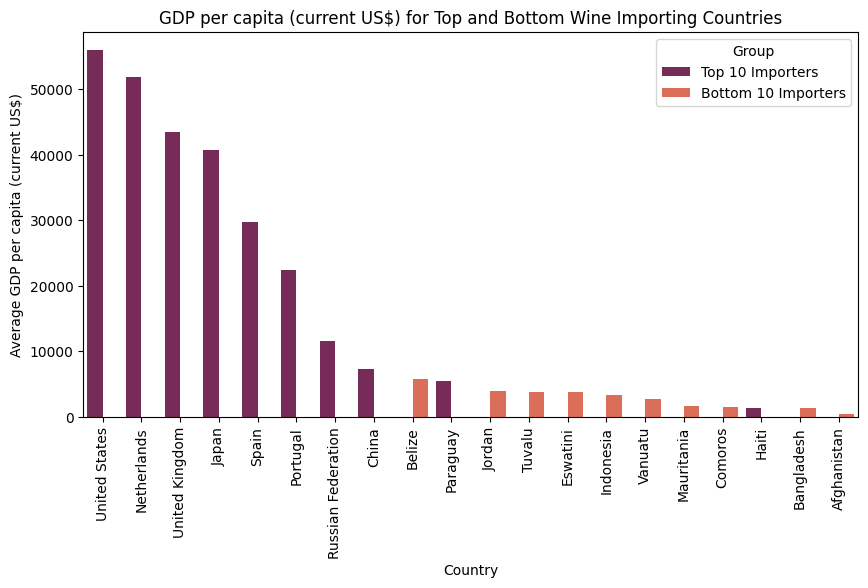

In [42]:
#match demographic series of Top and Bottom 10 countries

top_10_demographics = demographic_data[demographic_data['Country'].isin(top_10_import['Country'])]
bottom_10_demographics = demographic_data[demographic_data['Country'].isin(bottom_10_import['Country'])]

#match GDP series of Top and Bottom 10 countries
top_10_gdp = top_10_demographics[top_10_demographics['Series Name'] == 'GDP per capita (current US$)']
bottom_10_gdp = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'GDP per capita (current US$)']

top_10_gdp['Group'] = 'Top 10 Importers'
bottom_10_gdp['Group'] = 'Bottom 10 Importers'

gdp_per_capita = pd.concat([top_10_gdp, bottom_10_gdp])

gdp_per_capita_sorted = gdp_per_capita.sort_values(by='Average', ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(x='Country', y='Average', hue='Group', data=gdp_per_capita_sorted, palette='rocket')

plt.title('GDP per capita (current US$) for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Average GDP per capita (current US$)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-59-c8cb0572a9b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_alcohol['Group'] = 'Top 10 Importers'
<ipython-input-59-c8cb0572a9b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_alcohol['Group'] = 'Bottom 10 Importers'


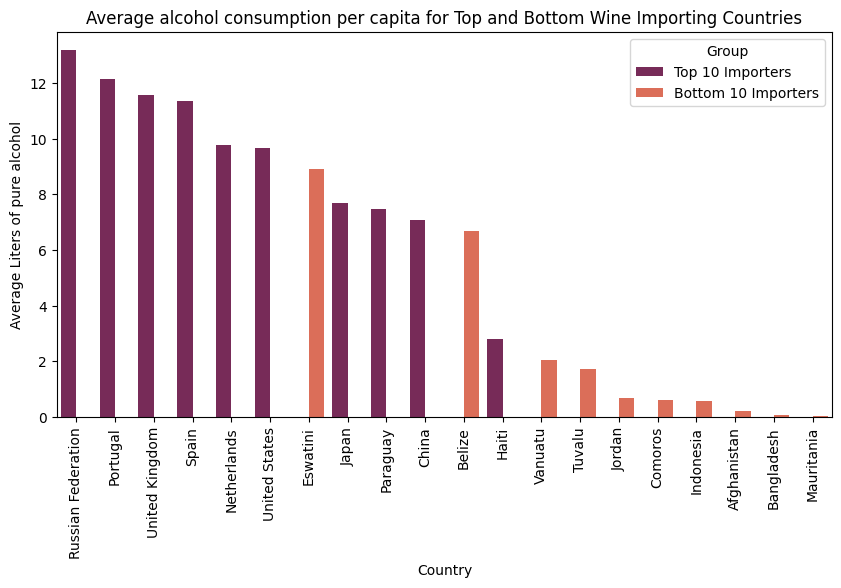

In [59]:
#match alcohol comsumption series of Top and Bottom 10 countries
top_10_alcohol = top_10_demographics[top_10_demographics['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']
bottom_10_alcohol = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']

top_10_alcohol['Group'] = 'Top 10 Importers'
bottom_10_alcohol['Group'] = 'Bottom 10 Importers'

alcohol_per_capita = pd.concat([top_10_alcohol, bottom_10_alcohol])
alcohol_per_capita = alcohol_per_capita.sort_values(by='Average', ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(x='Country', y='Average', hue='Group', data=alcohol_per_capita, palette='rocket')

plt.title('Average alcohol consumption per capita for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Average Liters of pure alcohol')
plt.xticks(rotation=90)
plt.show()


<ipython-input-60-f4b3394e9aa3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_alcohol_male['Group'] = 'Top 10 Importers'
<ipython-input-60-f4b3394e9aa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_alcohol_male['Group'] = 'Bottom 10 Importers'


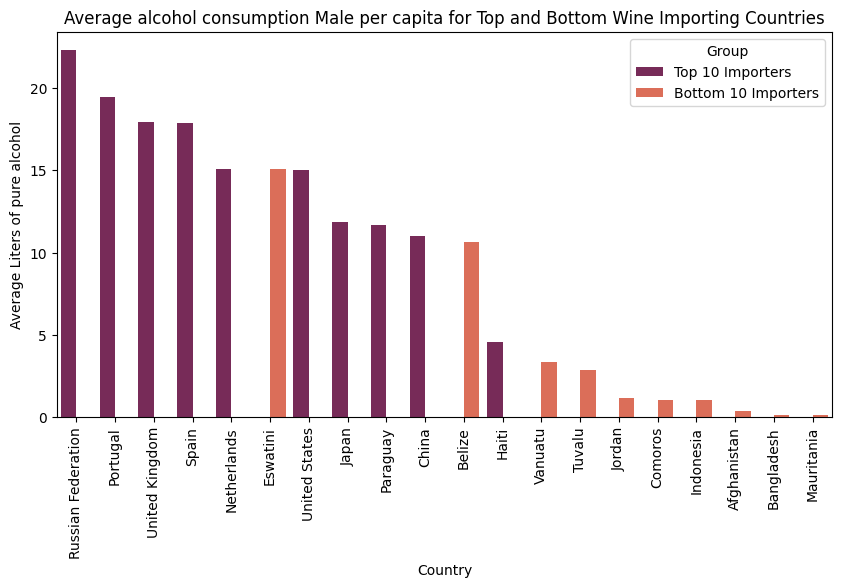

In [60]:
#match alcohol comsumption for male series of Top and Bottom 10 countries
top_10_alcohol_male = top_10_demographics[top_10_demographics['Series Name'] == 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)']
bottom_10_alcohol_male = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)']

top_10_alcohol_male['Group'] = 'Top 10 Importers'
bottom_10_alcohol_male['Group'] = 'Bottom 10 Importers'

alcohol_per_capita_male = pd.concat([top_10_alcohol_male, bottom_10_alcohol_male])
alcohol_per_capita_male = alcohol_per_capita_male.sort_values(by='Average', ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(x='Country', y='Average', hue='Group', data=alcohol_per_capita_male, palette='rocket')

plt.title('Average alcohol consumption Male per capita for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Average Liters of pure alcohol')
plt.xticks(rotation=90)
plt.show()


<ipython-input-61-5706ffbf6924>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_alcohol_female['Group'] = 'Top 10 Importers'
<ipython-input-61-5706ffbf6924>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_alcohol_female['Group'] = 'Bottom 10 Importers'


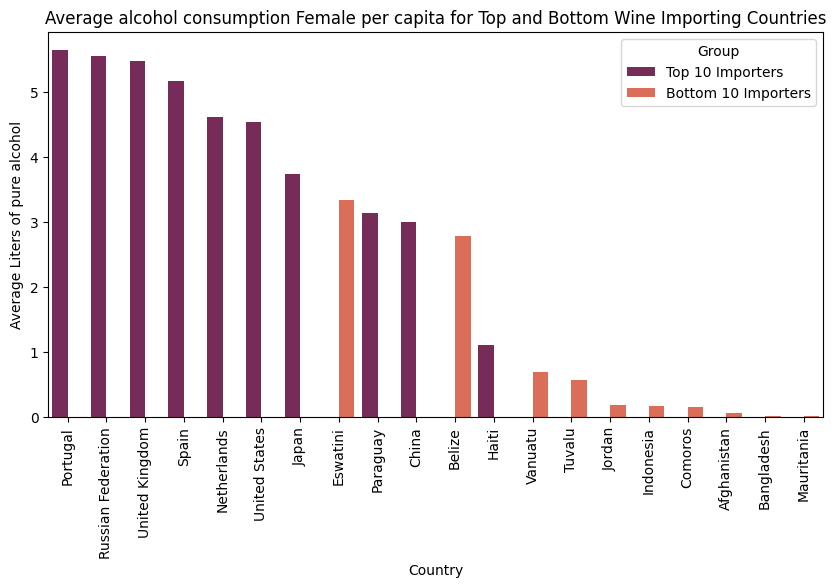

In [61]:
#match alcohol comsumption for female series of Top and Bottom 10 countries
top_10_alcohol_female = top_10_demographics[top_10_demographics['Series Name'] == 'Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)']
bottom_10_alcohol_female = bottom_10_demographics[bottom_10_demographics['Series Name'] == 'Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)']

top_10_alcohol_female['Group'] = 'Top 10 Importers'
bottom_10_alcohol_female['Group'] = 'Bottom 10 Importers'

alcohol_per_capita_female = pd.concat([top_10_alcohol_female, bottom_10_alcohol_female])
alcohol_per_capita_female = alcohol_per_capita_female.sort_values(by='Average', ascending=False)
plt.figure(figsize=(10, 5))

sns.barplot(x='Country', y='Average', hue='Group', data=alcohol_per_capita_female, palette='rocket')

plt.title('Average alcohol consumption Female per capita for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Average Liters of pure alcohol')
plt.xticks(rotation=90)
plt.show()


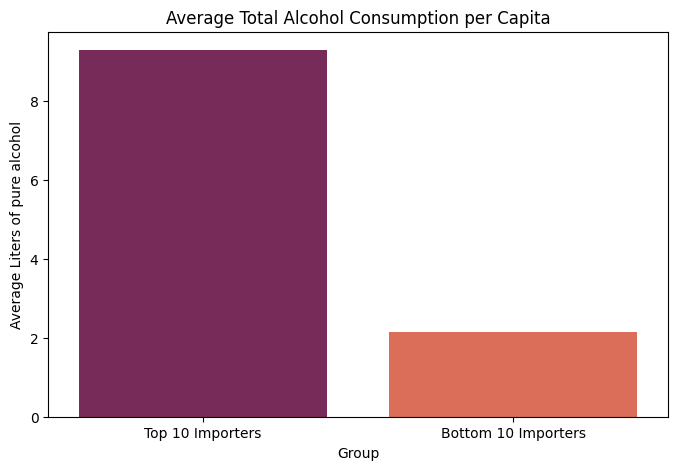

In [84]:
#match total average alcohol comsumption by Top and Bottom 10 countries
top_10_import_mean = top_10_alcohol['Average'].mean()
bottom_10_export_mean = bottom_10_alcohol['Average'].mean()

mean_data = pd.DataFrame({'Group': ['Top 10 Importers', 'Bottom 10 Importers'],
                          'Mean': [top_10_import_mean, bottom_10_export_mean]})

plt.figure(figsize=(8, 5))
sns.barplot(x='Group', y='Mean', data=mean_data, palette='rocket')
plt.title('Average Total Alcohol Consumption per Capita')
plt.ylabel('Average Liters of pure alcohol')
plt.show()


<ipython-input-85-fbc9cc71ab41>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_population['Group'] = 'Top 10 Importers'
<ipython-input-85-fbc9cc71ab41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_population['Group'] = 'Bottom 10 Exporters'
<ipython-input-85-fbc9cc71ab41>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

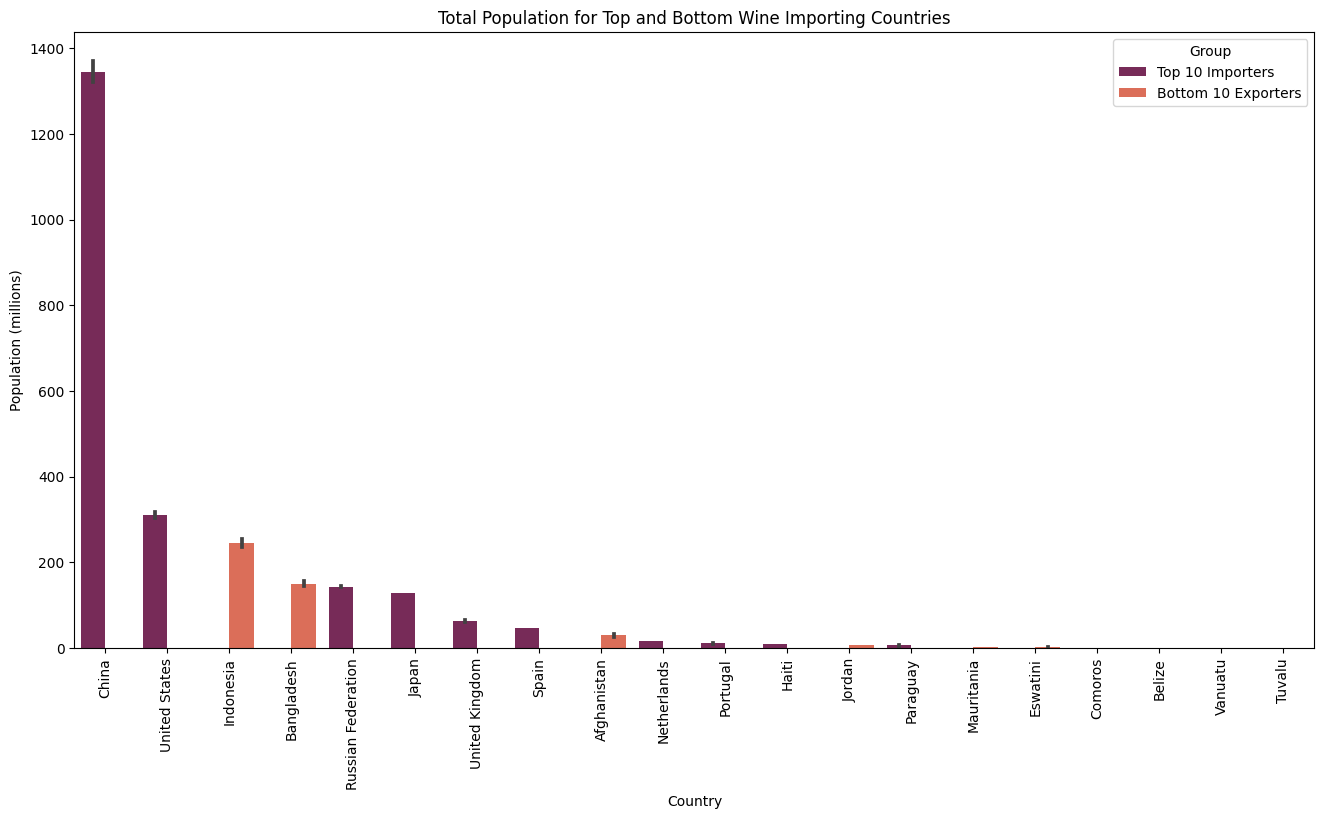

In [85]:
#match total population series of Top and Bottom 10 countries
population_total = demographics_filtered[demographics_filtered['Series Name'] == 'Population, total']

top_10_population = population_total[population_total['Country'].isin(top_10_import['Country'])]
bottom_10_population = population_total[population_total['Country'].isin(bottom_10_import['Country'])]

top_10_population['Group'] = 'Top 10 Importers'
bottom_10_population['Group'] = 'Bottom 10 Exporters'
top_10_population['Average'] = top_10_population['Average'] / 1e6
bottom_10_population['Average'] = bottom_10_population['Average'] / 1e6

population_data = pd.concat([top_10_population, bottom_10_population])
population_data = population_data.sort_values(by='Average', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x='Country', y='Average', hue='Group', data=population_data, palette='rocket')
plt.title('Total Population for Top and Bottom Wine Importing Countries')
plt.xlabel('Country')
plt.ylabel('Population (millions)')
plt.xticks(rotation=90)
plt.show()
